In [316]:
import os
import numpy as np
import pandas as pd
import csv
COMMENT_PATH = 'Dataset/comments.csv'
TRANSCRIPT_FOLDER = "Dataset/Transcripts/"
INFO_PATH = "Dataset/videos.csv"
LOG_ERROR_PATH = "DataCollection/error_log.csv"
LOG_SUCCESS_PATH = "DataCollection/success_log.csv"

# 1. Clean empty file
* 清除没有comment / transcript的数据

In [2]:
comment_df = pd.read_csv(COMMENT_PATH)
info_df = pd.read_csv(INFO_PATH)

In [3]:
comment_df.describe()

,vid,uid,content,votes
count,481821,481821,481817,389255
unique,4229,236830,220950,1191
top,wlCz8nkDNqo,UgxXGMg96x9dS7ZcJut4AaABAg,❤,1
freq,480,12,769,52884


In [4]:
comment_df.shape

(481821, 4)

In [5]:
comment_df = comment_df.drop_duplicates(['uid', 'content'])

In [6]:
cleaned_info_df = info_df[info_df['vid'].isin(comment_df['vid'])]
cleaned_info_df.shape

(4410, 7)

In [7]:
# transcript 有1800+个video是空的
empty_vids = set()
for file in os.listdir(TRANSCRIPT_FOLDER):
    if file == '.DS_Store':
        continue
    with open(os.path.join(TRANSCRIPT_FOLDER, file), 'r')as f:
        lines = f.readlines()
        if len(lines) <= 5:
            vid = file.split('.')[0]
            empty_vids.add(vid)

In [8]:
cleaned_info_df = cleaned_info_df[~info_df['vid'].isin(empty_vids)]

<ipython-input-8-8912f1cf3b77>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_info_df = cleaned_info_df[~info_df['vid'].isin(empty_vids)]


In [9]:
deleted_infos = info_df[~info_df['vid'].isin(cleaned_info_df['vid'])]
deleted_infos.shape

(2523, 7)

In [10]:
cleaned_info_df.shape

(2860, 7)

In [11]:
cleaned_info_df = cleaned_info_df.drop_duplicates(['vid'])
cleaned_info_df.shape

(2740, 7)

In [12]:

cleaned_info_df.to_csv('info.csv', index=None)

## 1.2 清理空数据之后的分类结果
1. News和Education 最多，都超过300了

In [13]:
deleted_infos['tag'].value_counts()

Education        376
News             372
Vlog             231
Music            221
Fashion          218
Art              194
Sport            176
Game             171
Entertainment    161
Tech             160
Food             127
Motivation       116
Name: tag, dtype: int64

<AxesSubplot:>

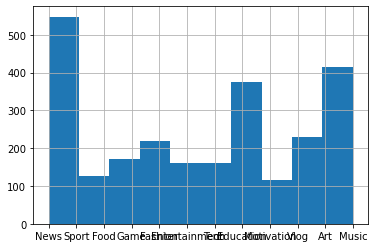

In [14]:
deleted_infos['tag'].hist()

# 2. Video Information Profile
* 每个属性的nan情况
* tag的分布
* 发布时间
* views需要处理成数据

 原来有5283个video

In [15]:
infos = pd.read_csv("info.csv")
infos.describe()

,vid,title,tag,time,duration,views,link
count,2740,2740,2740,2740,2740,2738,2740
unique,2740,2734,12,89,1481,2735,2740
top,syvOBw0JFyQ,I Went UNDERCOVER in Nick Eh 30's Fashion Show!,Tech,1 month ago,1:00,"471,298 views",https://www.youtube.com/watch?v=HMYcI90njDw
freq,1,2,306,252,25,2,1


## 2.1 duration

In [16]:
infos['duration']

0       3:11
1       8:35
2       3:46
3       1:41
4       2:41
        ... 
2735    3:27
2736    4:57
2737    3:08
2738    2:32
2739    3:42
Name: duration, Length: 2740, dtype: object

In [17]:
def trans_duration(string):
    miniute, second = string.split(':')[-2], string.split(':')[-1]
    if len(string.split(':')) == 3:
        hour = string.split(':')[0]
    else:
        hour = 0
    return (int(hour)* 3600 + int(miniute)*60 + int(second))/60
infos['duration'] = infos['duration'].apply(trans_duration)
infos['duration'].describe()

count    2740.000000
mean       18.942701
std        35.841803
min         0.216667
25%         6.083333
50%        11.500000
75%        19.450000
max       801.566667
Name: duration, dtype: float64

In [18]:
infos = infos[infos['duration'] < 20]
infos.describe()

,duration
count,2086.000000
mean,9.254666
std,5.196186
min,0.216667
25%,4.583333
50%,9.116667
75%,13.262500
max,19.983333


## 2.2 views

In [19]:
infos.views

0          143,423 views
1        1,129,023 views
2           73,366 views
3          122,448 views
4          309,045 views
              ...       
2735         1,261 views
2736       806,112 views
2737    37,929,473 views
2738     1,095,318 views
2739       335,583 views
Name: views, Length: 2086, dtype: object

In [20]:
def trans_views(string):
    try:
        return int(string.strip('views').replace(',',''))/10000
    except:
        return 
infos['view_10k'] = infos['views'].apply(trans_views)

In [21]:
infos['view_10k']

0         14.3423
1        112.9023
2          7.3366
3         12.2448
4         30.9045
          ...    
2735       0.1261
2736      80.6112
2737    3792.9473
2738     109.5318
2739      33.5583
Name: view_10k, Length: 2086, dtype: float64

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'view_10k'}>]], dtype=object)

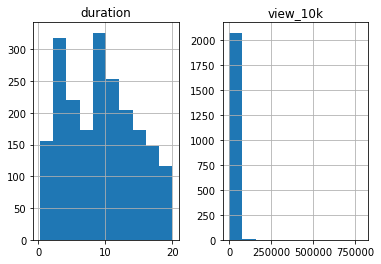

In [22]:
infos.hist()

In [23]:
infos.to_csv('new_infos.csv', index = None)

In [24]:
infos = pd.read_csv("new_infos.csv")
infos.head()

,vid,title,tag,time,duration_min,views,link,view_10k
0,tZa4hs1MY3Y,Secret Service pushes back on allegations in r...,News,1 day ago,3.183333,"143,423 views",https://www.youtube.com/watch?v=tZa4hs1MY3Y,14.3423
1,oOcZRxBwZ1k,Trump Coup Nightmare: See The Moment Fox News ...,News,15 hours ago,8.583333,"1,129,023 views",https://www.youtube.com/watch?v=oOcZRxBwZ1k,112.9023
2,jLkqmXmkVkE,Putin warns after Finland and Sweden invited t...,News,15 hours ago,3.766667,"73,366 views",https://www.youtube.com/watch?v=jLkqmXmkVkE,7.3366
3,t2nu91KU25g,Biden loses Supreme Court ruling as court rein...,News,1 hour ago,1.683333,"122,448 views",https://www.youtube.com/watch?v=t2nu91KU25g,12.2448
4,tSJf6KEC5qc,India state on alert after Prophet Muhammad ro...,News,23 hours ago,2.683333,"309,045 views",https://www.youtube.com/watch?v=tSJf6KEC5qc,30.9045


## 3. Comment

In [262]:
comments = pd.read_csv('Dataset/comments.csv')
comments.head()

,vid,uid,content,votes
0,tZa4hs1MY3Y,UgxDRq2kfKKUdlLpBZl4AaABAg,I would be shocked if the committee hasn't alr...,170.0
1,tZa4hs1MY3Y,Ugxove78337i20X3u614AaABAg,My favorite part of the hearing was at the end:,2.0
2,tZa4hs1MY3Y,UgxOhb_QtgvMJ8Age_B4AaABAg,Her position within the west wing was specific...,4.0
3,tZa4hs1MY3Y,UgwSx3EZ9UZXPwroBB54AaABAg,"""Too good to verify"" as they say in the ABC, N...",6.0
4,tZa4hs1MY3Y,Ugz1NKYar4WApnMFHyd4AaABAg,Her “hear say” testimony would never be allowe...,1.0


In [263]:
comments.describe()

,votes
count,238443.000000
mean,248.606761
std,3432.461400
min,0.000000
25%,1.000000
50%,4.000000
75%,23.000000
max,855000.000000


## 3.1 检查重复情况
超过一半重复

In [232]:
comments.shape

(238482, 4)

In [118]:
comments = comments.drop_duplicates()
comments.shape

(238482, 4)

In [120]:
comments.to_csv(COMMENT_PATH, index=None)

## 3.2  检查平均每个vid有几个评论
1. vid一共4229个
2. mean = 56条评论
3. 大部分都是60条

[x] 是否需要处理大部分60条，分布太均匀的问题？  

In [121]:
comments['vid'].value_counts().describe()

count    4240.000000
mean       56.245755
std        12.173414
min         1.000000
25%        60.000000
50%        60.000000
75%        60.000000
max       109.000000
Name: vid, dtype: float64

<AxesSubplot:>

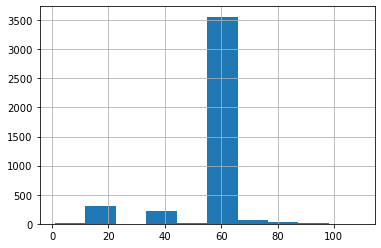

In [122]:
comments['vid'].value_counts().hist()

## 3.3 uid 数据
一共236830个评论，大多数评论都只出现了一次

In [123]:
comments['uid'].value_counts().describe()

count    236839.000000
mean          1.006929
std           0.083103
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: uid, dtype: float64

<AxesSubplot:>

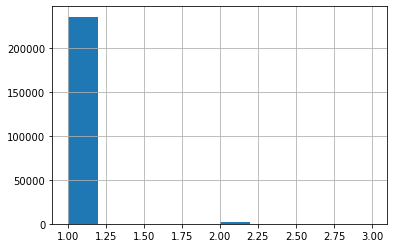

In [132]:
comments.uid.value_counts().hist()

## 3.4 comment votes

In [136]:
comments.votes

0         170.0
1           2.0
2           4.0
3           6.0
4           1.0
          ...  
238477      0.0
238478      0.0
238479      0.0
238480      8.0
238481     15.0
Name: votes, Length: 238482, dtype: float64

In [126]:
# 处理votes
def trans_votes(string):
    if isinstance(string, str):
        if 'k' == string[-1].lower():
            return float(string[:-1])*1000
        return float(string)
comments['votes'] = comments['votes'].fillna('0')
comments['votes'] = comments['votes'].apply(trans_votes)


<AxesSubplot:>

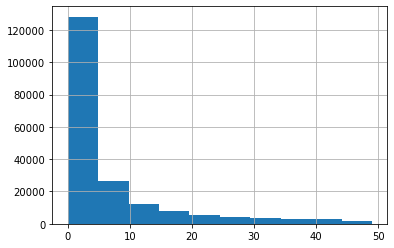

In [140]:
comments[comments.votes<50]['votes'].hist()

## 3.5 content
* 去除除了英文和标点符号以外的所有文字
* 如果剩余文字少于原文字的1/4，则删除整行
* 删除所有小于五个字的content
* 标记出现超过50次的高频评论freq = True/ False

平均字长18

In [264]:
comments = comments.dropna(subset=['content'])

In [265]:
comments.shape

(238468, 4)

In [266]:
import re
texts = list(comments['content'])
def filter_str(desstr, restr=''):
    pattern = re.compile("[^a-z^A-Z^0-9^.^,^:^;^!^?^(^)^_^*^\"^' ]")
    res = pattern.sub(restr, desstr)
    if len(desstr) > len(res)*3:
        return ''
    return res.strip()
comments['en_content'] = comments['content'].apply(filter_str)

In [267]:
comments.head()

,vid,uid,content,votes,en_content
0,tZa4hs1MY3Y,UgxDRq2kfKKUdlLpBZl4AaABAg,I would be shocked if the committee hasn't alr...,170.0,I would be shocked if the committee hasn't alr...
1,tZa4hs1MY3Y,Ugxove78337i20X3u614AaABAg,My favorite part of the hearing was at the end:,2.0,My favorite part of the hearing was at the end:
2,tZa4hs1MY3Y,UgxOhb_QtgvMJ8Age_B4AaABAg,Her position within the west wing was specific...,4.0,Her position within the west wing was specific...
3,tZa4hs1MY3Y,UgwSx3EZ9UZXPwroBB54AaABAg,"""Too good to verify"" as they say in the ABC, N...",6.0,"""Too good to verify"" as they say in the ABC, N..."
4,tZa4hs1MY3Y,Ugz1NKYar4WApnMFHyd4AaABAg,Her “hear say” testimony would never be allowe...,1.0,Her hear say testimony would never be allowed ...


In [268]:
empty_indexs = [i for i, comment in comments.iterrows() if len(comment['en_content']) <= 5]

In [269]:
comments.loc[empty_indexs]

,vid,uid,content,votes,en_content
72,uBZhjmYRWfg,Ugxw9lyfN-J8H3aZL2p4AaABAg,😃,6.0,
83,uBZhjmYRWfg,UgyftiODgrY9RNlheuF4AaABAg,At,8.0,At
193,jLkqmXmkVkE,UgwLZNXWtiHCR2-g3Sh4AaABAg,Lol,9.0,Lol
216,jLkqmXmkVkE,UgxglW4PYKyHHUN3m6J4AaABAg,@,1.0,
228,jLkqmXmkVkE,UgzKyut0uYPBdtKSqBt4AaABAg,0:30,1.0,0:30
...,...,...,...,...,...
238407,duNgBE722vs,UgxzdBZK20CgXypINMV4AaABAg,🔥,2.0,
238408,duNgBE722vs,Ugw7GeKem8HsHPEdlVZ4AaABAg,🔥,2.0,
238411,duNgBE722vs,Ugyd4HkOCe-nq25RtO14AaABAg,💥,1.0,
238448,goMpYAe8e60,Ugz5Ri5duJOiALAO49Z4AaABAg,03:00,129.0,03:00


In [270]:
comments.drop(index=empty_indexs, inplace=True)

In [271]:
comments.shape

(212012, 5)

In [275]:
content_count = comments['en_content'].value_counts()
freq_content = list(content_count[content_count>50].index)
comments['freq'] = comments['en_content'].isin(freq_content)

In [295]:
comments.to_csv('comments.csv', index = None)

In [298]:
# 平均字长
word_length = comments['en_content'].apply(lambda x: len(x.split()))
word_length.mean()

18.385143293775823

In [302]:
unfreq_length = comments[comments['freq']== False]['en_content'].apply(lambda x: len(x.split()))
unfreq_length.mean()

18.508330283253397

# 4 Transcript

In [326]:
# transcript 有1800+个video是空的
empty_trsc_vids = set()
for file in os.listdir(TRANSCRIPT_FOLDER):
    if file == '.DS_Store':
        continue
    path = os.path.join(TRANSCRIPT_FOLDER, file)
    with open(path, 'r')as f:
        lines = f.readlines()
        if len(lines) <= 5:
            vid = file.split('.')[0]
            print(vid)
            print(lines)
            print('='*50)
            empty_trsc_vids.add(vid)

SWuCHInOzVo
['vid,start,end,text\n']
JNZi3k2Tiy8
['vid,start,end,text\n']
N2ZoCMFhm24
['vid,start,end,text\n', 'vid,start,end,text\n']
K9002nnOxGo
['vid,start,end,text\n']
rVL3f6fmBaI
['vid,start,end,text\n']
XGz9xmElQpA
['vid,start,end,text\n']
yw_0Y7PV3dk
['vid,start,end,text\n']
SrC5nmjAkLA
['vid,start,end,text\n']
fUrYMg9b8gY
['vid,start,end,text\n']
mhsckf9XFqc
['vid,start,end,text\n']
NnveHfic4_4
['vid,start,end,text\n']
_tLSF_5g1sI
['vid,start,end,text\n']
MEixcgFWM_s
['vid,start,end,text\n']
STKaSiLBrnU
['vid,start,end,text\n']
jAMIUWVrmQc
['vid,start,end,text\n', 'vid,start,end,text\n']
JqB5m1hUWic
['vid,start,end,text\n']
3uyD73pd6Hc
['vid,start,end,text\n', '3uyD73pd6Hc,2450,31679,[Music]\n', '3uyD73pd6Hc,31679,33920,you\n']
el2ZakIz15M
['vid,start,end,text\n']
A9dkpylxPg0
['vid,start,end,text\n']
dw6e6sb238o
['vid,start,end,text\n']
O2FD9lDm_yk
['vid,start,end,text\n']
8b4eHVA5ud8
['vid,start,end,text\n']
zh7IbY45v00
['vid,start,end,text\n']
iuue32AdeE8
['vid,start,end,text

XkGkzS0KYak
['vid,start,end,text\n']
_3gQ2aI96bc
['vid,start,end,text\n']
6NlqLiTZOwM
['vid,start,end,text\n']
l5gu2Qt_zlE
['vid,start,end,text\n']
iFeNNXIK6SY
['vid,start,end,text\n']
DYfeWzeeGdU
['vid,start,end,text\n']
o-TQmg-mT6U
['vid,start,end,text\n']
PsQr3EsWVC0
['vid,start,end,text\n']
XYSIf3wSDxo
['vid,start,end,text\n', 'vid,start,end,text\n']
DiP5eorRbzo
['vid,start,end,text\n']
6Q3jBT_FIjE
['vid,start,end,text\n']
x_VVYbnSxW0
['vid,start,end,text\n']
AY66um6i5NY
['vid,start,end,text\n']
pqqSq0jLx60
['vid,start,end,text\n']
3UEDRnbpfC8
['vid,start,end,text\n']
t2sLG4zY_p8
['vid,start,end,text\n']
FvAXv1nL4Os
['vid,start,end,text\n']
p9_VIJ5Zlvw
['vid,start,end,text\n']
fxq-4z1Jm70
['vid,start,end,text\n']
iMRe40YCsOA
['vid,start,end,text\n']
UQEPj6Rjv74
['vid,start,end,text\n']
YFHDN9o1SYA
['vid,start,end,text\n']
GGOyFnrZRt0
['vid,start,end,text\n']
MK8WtiFqzHg
['vid,start,end,text\n']
YJ5Fp-cMDms
['vid,start,end,text\n']
p1O6MK1bgJE
['vid,start,end,text\n']
_lyAEL4Wqao
['

r5m6ScpU0yY
['vid,start,end,text\n']
4HsJRGFmUYU
['vid,start,end,text\n']
9II3OGZETo4
['vid,start,end,text\n']
9fU60gxNScI
['vid,start,end,text\n']
zgF9fXqBT8I
['vid,start,end,text\n']
_nDY51hCSks
['vid,start,end,text\n']
ICngCwCFuYw
['vid,start,end,text\n']
pikN2gikR7s
['vid,start,end,text\n']
2V69tiQ2Dc4
['vid,start,end,text\n']
BuYTSjlogls
['vid,start,end,text\n']
iBoQ5dEzLg0
['vid,start,end,text\n']
cRTfVZdgxRY
['vid,start,end,text\n']
xn2fAgy7vkU
['vid,start,end,text\n']
YhUAM0oNWB0
['vid,start,end,text\n']
_vzk_1AayP4
['vid,start,end,text\n']
_EqimXptaSU
['vid,start,end,text\n']
fLexgOxsZu0
['vid,start,end,text\n']
IsU96wApBco
['vid,start,end,text\n']
hTJ34u_YQAQ
['vid,start,end,text\n']
Yt6IG7DhK54
['vid,start,end,text\n']
D7mR3p1bqiM
['vid,start,end,text\n']
Z6k7TQ8omQg
['vid,start,end,text\n']
tAqDL1a24Ls
['vid,start,end,text\n']
kY_P39ftBZY
['vid,start,end,text\n']
Fl8v9zgKNEU
['vid,start,end,text\n']
hMegi2eNLYI
['vid,start,end,text\n']
wtQXmiAtCVQ
['vid,start,end,text\n']
G

6drmSFwleC4
['vid,start,end,text\n', 'vid,start,end,text\n']
cME8srXXAog
['vid,start,end,text\n']
Meu0ws-BoCg
['vid,start,end,text\n']
5kuLbHZCL20
['vid,start,end,text\n']
kavFl8OHaJU
['vid,start,end,text\n']
KPtg8q4kNRo
['vid,start,end,text\n']
1RjvpCm_7uA
['vid,start,end,text\n']
3C13ae5TL0g
['vid,start,end,text\n']
LD_uiagU4hs
['vid,start,end,text\n']
xEhDcxcjAMY
['vid,start,end,text\n']
nO_yaO-HRc4
['vid,start,end,text\n']
gJXAZdZ6ZG0
['vid,start,end,text\n']
CHV6BjuQOZQ
['vid,start,end,text\n']
9VMoUUv66RY
['vid,start,end,text\n']
rzHid18W3ek
['vid,start,end,text\n']
0WiDAkudKqU
['vid,start,end,text\n']
EmgPjS_WGeY
['vid,start,end,text\n']
HEF9crKbaIk
['vid,start,end,text\n']
S4xUjS7Pq9U
['vid,start,end,text\n']
Z4VQKlwOGOo
['vid,start,end,text\n']
T5N9IVPUIQs
['vid,start,end,text\n']
VQeW62X8rEA
['vid,start,end,text\n']
CBNLwaxirM4
['vid,start,end,text\n']
yyt5eo_NS_k
['vid,start,end,text\n']
mDYBE6WK994
['vid,start,end,text\n']
e24UbVcEWIo
['vid,start,end,text\n']
1t1NUxVRfoY
['

CXCUNFsobKg
['vid,start,end,text\n']
UNDe_UNMzkI
['vid,start,end,text\n']
qzBh7968GFo
['vid,start,end,text\n']
sydO1V6DslY
['vid,start,end,text\n']
BtaPTeT5b90
['vid,start,end,text\n']
79ehieFfUDo
['vid,start,end,text\n']
ZsoGPjn1MXM
['vid,start,end,text\n']
nOwjaqLXaek
['vid,start,end,text\n']
QXHwSJ2CNj0
['vid,start,end,text\n', 'vid,start,end,text\n']
GBL5in9fgWo
['vid,start,end,text\n']
ZRIdNmF-kRw
['vid,start,end,text\n']
vadssi77q-U
['vid,start,end,text\n']
zLhBQb9OJt0
['vid,start,end,text\n']
MYa9305Q5II
['vid,start,end,text\n']
-7eMs06292k
['vid,start,end,text\n']
ga5uPjlTBu4
['vid,start,end,text\n']
HwZ5MGaf3qM
['vid,start,end,text\n']
sUE4a9cqU9c
['vid,start,end,text\n']
C8BJ1dbVxoc
['vid,start,end,text\n']
hlWiI4xVXKY
['vid,start,end,text\n']
DUT5rEU6pqM
['vid,start,end,text\n']
mlt2xepDJJY
['vid,start,end,text\n']
K94do7tiMNQ
['vid,start,end,text\n', 'K94do7tiMNQ,36239,39239,so\n', 'K94do7tiMNQ,57039,59280,bye\n']
tuzZTHQ9sGs
['vid,start,end,text\n']
eQo_tJdZMkI
['vid,start

zTcXTHXUsy0
['vid,start,end,text\n']
cH0gED2stDM
['vid,start,end,text\n', 'vid,start,end,text\n']
PtSRvqsIc9M
['vid,start,end,text\n']
Bgm2naUtoJo
['vid,start,end,text\n', 'vid,start,end,text\n']
f92Pa3DWsaw
['vid,start,end,text\n']
Ly61E8fUC8A
['vid,start,end,text\n']
aWdGWNIye8M
['vid,start,end,text\n', 'aWdGWNIye8M,1760,3199,ah so cool\n', 'aWdGWNIye8M,3199,16400,can you get a photo\n']
0ee6614n_Y4
['vid,start,end,text\n']
R7YfAdq1Gik
['vid,start,end,text\n']
FPPtGEzhyYE
['vid,start,end,text\n']
q4qBZ9WN_2U
['vid,start,end,text\n']
r2tZ0uk3ozc
['vid,start,end,text\n']
gXvlgbdBSI8
['vid,start,end,text\n']
uDh7TvSDqL4
['vid,start,end,text\n']
DcEIAWQZZAA
['vid,start,end,text\n']
aezz1qHm2FE
['vid,start,end,text\n']
edcGX50fWj8
['vid,start,end,text\n']
fnQMgCqgrOw
['vid,start,end,text\n']
z6rBohIkTGw
['vid,start,end,text\n']
wuJWFuHFaeM
['vid,start,end,text\n']
5b0eGA0iq2Y
['vid,start,end,text\n', 'vid,start,end,text\n', 'vid,start,end,text\n']
dJlfT_MmEQE
['vid,start,end,text\n']
S2Oh

2TjBYEi3uWQ
['vid,start,end,text\n']
PtfOiOAEMGI
['vid,start,end,text\n']
FEUB5no7Fyc
['vid,start,end,text\n']
FHrLi6QhsLA
['vid,start,end,text\n']
7TtmKuiha7s
['vid,start,end,text\n']
yJu8nAImSoU
['vid,start,end,text\n']
7J_nS0CJOLo
['vid,start,end,text\n']
ZHZHwCPy-BU
['vid,start,end,text\n']
yAEOluL8LBA
['vid,start,end,text\n']
0KSOMA3QBU0
['vid,start,end,text\n']
yWOM-Zb6ZK4
['vid,start,end,text\n']
mcLL6Ghlpf8
['vid,start,end,text\n']
2JYSvYyJ5Qs
['vid,start,end,text\n', '2JYSvYyJ5Qs,86560,89560,dhaka\n']
UsLJLCtU32w
['vid,start,end,text\n']
g1mdSZ9O6IQ
['vid,start,end,text\n']
rAmJieNqbtk
['vid,start,end,text\n']
HLtEPh4RJY4
['vid,start,end,text\n']
EjhpKxgYgOQ
['vid,start,end,text\n']
s_Jm1c79MKg
['vid,start,end,text\n', 's_Jm1c79MKg,0,3000,سحر طلاء البالون الدوراني\n', 's_Jm1c79MKg,35052,38033,- تجهيز الزوايا والحواف -\n', 's_Jm1c79MKg,159494,163467,- طلاء أبيض حتى يتدفق الطلاء الملون بشكل أفضل -\n']
ELK6tJAmoCY
['vid,start,end,text\n']
z5NUdQtNJds
['vid,start,end,text\n']
uYjw

In [335]:
vid = 'bGaNSlfrsI0'
path = os.path.join(TRANSCRIPT_FOLDER, vid+'.csv')
with open(path, 'r') as f:
    print(f.readlines())

['vid,start,end,text\n']


In [336]:
for vid in empty_trsc_vids:
    try:
        path = os.path.join(TRANSCRIPT_FOLDER, vid+'.csv')
        os.remove(path)
        print(vid, 'deleted')
    except:
        print(vid, 'error')

e96kTezqN4s deleted
_vzk_1AayP4 deleted
GTMVF7AUq3k deleted
JeuYG973BFY deleted
t4kkzsRJObE deleted
OnyPBEm_Kcw deleted
sJSbRTYrcx0 deleted
beLHDvZXhfg deleted
DbybWWMdlJA deleted
rVL3f6fmBaI deleted
CHV6BjuQOZQ deleted
3iqyjt15uKQ deleted
R7YfAdq1Gik deleted
9ko2k3w42_M deleted
oHgaPuFdw_w deleted
kYwTqFYBK6E deleted
VdUEHNPWsb4 deleted
R0nXu-FkINU deleted
8J8Cs-rzEZk deleted
F-z6u5hFgPk deleted
mad6bT7Q72Y deleted
4v1zuIYNoFw deleted
5EbXv41b2J4 deleted
rrfgFue75uA deleted
QHSpYF5097M deleted
coYw-eVU0Ks deleted
cB2w7NNxwMo deleted
GHiYXdZFpbU deleted
XSps1xnP7X4 deleted
9H6a9-DTlKQ deleted
KjSQWjmN2mI deleted
mguYzlef-hc deleted
iBoQ5dEzLg0 deleted
X3rmqcegbDU deleted
xSgEkH4XkH4 deleted
P__gilcQEDA deleted
uSkhkVgok44 deleted
y8HV9DLX4Ms deleted
Kd0l-fVPr4c deleted
-5hslshgW3c deleted
pekzpzNCNDQ deleted
jSBC3hxoo6Y deleted
CDUHRcv7wHQ deleted
PsQr3EsWVC0 deleted
7Y1CdqdRoRQ deleted
tNN8JCf4Wms deleted
tAqDL1a24Ls deleted
ftOpah7fung deleted
hrsRXDNpruo deleted
Ku81ZOmBgq4 deleted


LFW2W14gHFI deleted
JGwWNGJdvx8 deleted
2eici1JxNJk deleted
JNeV2gET3RQ deleted
UkAhD3BHTQo deleted
kYed_HfqrVw deleted
fm3Hz9bLwhY deleted
6SEH7k_GVw4 deleted
u-gBnBJrLj8 deleted
rAIhlsJU8oU deleted
B8PGB2tnmeg deleted
vkFJorVI87E deleted
aeZp8Nm4gHM deleted
yJu8nAImSoU deleted
4zMK7ZuQvXE deleted
s9snnBMXEH0 deleted
9n1zd_bW43U deleted
gsqnvTUmkt0 deleted
jJ6nxc7BgOU deleted
3cza10kwlFQ deleted
GkiZyRT9bZQ deleted
oBPUfsozvoA deleted
WvAJxwUl8uM deleted
YhUAM0oNWB0 deleted
hCCHbRFd_LA deleted
oFqVvjq6BGM deleted
5kEfq8jPsu4 deleted
s88rViwDhbM deleted
_3gQ2aI96bc deleted
5GvA_cSofWc deleted
oo-c1xw_oJE deleted
xc-xCF1FZZY deleted
C5AebtW2dik deleted
39lblWon10M deleted
gFJwBSiqtdc deleted
LpmPDk3zus4 deleted
orJSJGHjBLI deleted
FvAXv1nL4Os deleted
JqB5m1hUWic deleted
vrJavT9X_T4 deleted
ZsoGPjn1MXM deleted
79ehieFfUDo deleted
BtaPTeT5b90 deleted
yTv7GrBsi0I deleted
dQiaHTvVIf4 deleted
6JcBCoezCGk deleted
Wp0vpwb8c74 deleted
Ce7k2Bg5eFA deleted
EnulhZuwz04 deleted
IsPFDzAGb4A deleted


## 4.1 去除非英文字符串

In [ ]:
def filter_str(desstr, restr=''):
    pattern = re.compile("[^a-z^A-Z^0-9^.^,^:^;^!^?^(^)^_^*^\"^' ]")
    res = pattern.sub(restr, desstr)
    if len(desstr) > len(res)*3:
        return ''
    return res.strip()